#MNIST - Conv2D
##**Warning**: Before executing all cells, have a look at the results first. The convolutional model will take approx. 20 minutes to train, if you use tensorflow without GPU support.

In [2]:
# Import packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D, BatchNormalization, Dropout

from tensorflow.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical

In [3]:
# Download and split mnist data
mnist_data = tf.keras.datasets.mnist
(mnist_x_train, mnist_y_train),(mnist_x_test, mnist_y_test) = mnist_data.load_data()

# Normalize the input values to be between 0 and 1
mnist_x_train, mnist_x_test = mnist_x_train / 255.0, mnist_x_test / 255.0

As shown in the lecture the handwritten digits of the MNIST dataset have dimensions $28\times 28$. Additionally, we can see that with the 'gray' colormap setting, the value of 0 corresponds to a black pixel and the value of 1 corresponds to a white pixel.

Dimensions of the digit is (28, 28)


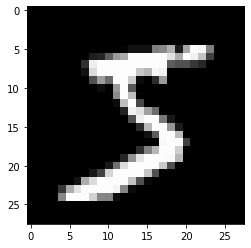

In [4]:
plt.imshow(mnist_x_train[0], cmap='gray')
print("Dimensions of the digit is {dimension}".format(dimension=mnist_x_train[0].shape))

Now we want to create a new dataset with samples of size $50\times50$ where the $28\times28$ sized handwritten digits are placed at different random positions. <br>
We have $22\times22=484$ possibilities to place an image of size $28\times28$ in an image of size $50\times50$.

In [5]:
# Define some helper functions

def generate_randomly_positioned_images(original_images):
    # Initialize new array that will contain the randomly positioned images
    randomly_positioned_images = []

    for index, original_image in enumerate(original_images):
        # Initialize a black image with of the size 50x50
        randomly_positioned_image = np.zeros((50,50))

        # Draw random x and y position out of the 22x22 possible positions
        random_x_position = np.random.randint(22)
        random_y_position = np.random.randint(22)

        # Place original image at the randomly chosen position
        randomly_positioned_image[random_x_position:random_x_position+28, random_y_position:random_y_position+28] = original_image
        randomly_positioned_images.append(randomly_positioned_image)

    return np.array(randomly_positioned_images)

def evaluate_model(model, model_history, x_test, y_test, model_name):
    # evaluate model
    score = model.evaluate(x_test, y_test, verbose=1)

    # print performance
    print('Test loss for {model_name}:'.format(model_name=model_name), score[0])
    print('Test accuracy for {model_name}:'.format(model_name=model_name), score[1])

    # summarize history for accuracy
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Accuracy of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()
    # summarize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Loss of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()

In [6]:
# Define some training setting parameters
number_of_classes = 10
batch_size = 128
epochs = 20

# Create new data sets with randomly positioned images
x_train = generate_randomly_positioned_images(mnist_x_train)
x_test = generate_randomly_positioned_images(mnist_x_test)

# convert class vectors to binary class matrices
y_train = to_categorical(mnist_y_train, number_of_classes)
y_test = to_categorical(mnist_y_test, number_of_classes)

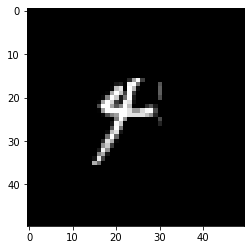

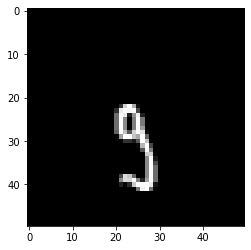

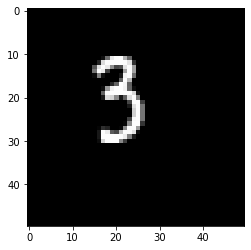

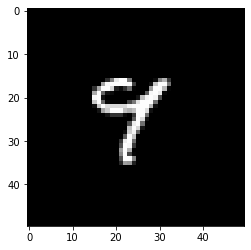

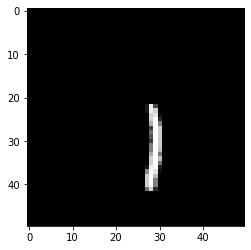

In [7]:
# Plot some samples from the new data set
for rand_sample in np.random.randint(100, size=5):
    fig = plt.figure()
    plt.imshow(x_train[rand_sample], cmap='gray')

Now we will use the network with a single hidden dense layer as in the lecture to train on this newly generated dataset.

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 2.2791 - accuracy: 0.1356 - val_loss: 2.2413 - val_accuracy: 0.1776

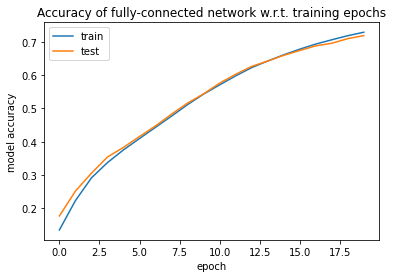

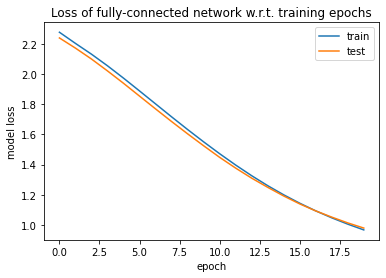

In [9]:
# Build neural network with single dense hidden layer
model_with_dense_hidden_layer = Sequential(name='Dense_network')
model_with_dense_hidden_layer.add(Flatten())
model_with_dense_hidden_layer.add(Dense(128, activation='relu'))
model_with_dense_hidden_layer.add(Dense(number_of_classes, activation='softmax'))

model_with_dense_hidden_layer.compile(loss='categorical_crossentropy',
              optimizer=SGD(), metrics=['accuracy'])

# Train and evaluate the model
history_of_dense_model = model_with_dense_hidden_layer.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

evaluate_model(model_with_dense_hidden_layer, history_of_dense_model, x_test, y_test, 'fully-connected network')
model_with_dense_hidden_layer.summary()

For comparison, this models performance on the original MNIST dataset (as shown in Jupyter notebook of the lecture) was:
* Test loss: 0.21528791082799434
* Test accuracy: 0.94

Now we build a network with convolutional layers, for comparability with the one hidden dense layer network, we will also only use only convolutional layer and train with the same batch size and epoch number. <br>
But before we can train with our convolutional network, we first need to **explicitly** add another dimension to our input samples so that they have the shape $50\times50\times1$

In [ ]:
x_train_reshaped = x_train[:,:,:, np.newaxis]
x_test_reshaped = x_test[:,:,:, np.newaxis]
input_shape = (50,50,1)

In [ ]:
#Build model
convolutional_model = Sequential(name='ConvolutionalNetwork')
convolutional_model.add(Conv2D(10, (28,28), input_shape=input_shape))
convolutional_model.add(Activation('relu'))
convolutional_model.add(Flatten())
convolutional_model.add(Dense(number_of_classes))
convolutional_model.add(Activation('softmax'))

convolutional_model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# Train and evaluate the convolutional model
history_of_convolutional_model = convolutional_model.fit(x_train_reshaped, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_reshaped, y_test))

evaluate_model(convolutional_model, history_of_convolutional_model, x_test_reshaped, y_test, 'convolutional network')
convolutional_model.summary()

As we can see, a simple convolutional network performs significantly better on the non-centered digits. In the plot above one can notice that the accuracy in the beginning increases much quicker than the accuracy of the densely connected network. This is to be expected, since one of the most significant property of the convolutional operation is that it is space invariant. This means that a convolutional layer 'learns' to detect a shape independent of the location of the shape.
Although, it should be noted that even though we only used one hidden convolutional layer this network still has a lot more weight parameters than the one hidden dense layer network. This is due to the fact that the convolutional network produces a lot of more hidden features (here: $23\times23\times10$) that have to be connected to the output layer at the end. If we take a look at the model summary that the number of parameters used in the kernel is similar to the number of parameters we have in the dense network.
Note that we used this kind of convolutional architecture because we have 10 different classes and the original picture size was $28\times28$. So it is intuitive to use 10 filters with a size of $28\times28$.

Now we will further fine tune our model and ideally get rid over the redundant parameters that are due to the dense network at the output layer.

In [ ]:
# Build model with better tuned settings and architecture
fine_tuned_model = Sequential(name='FineTunedNetwork')
fine_tuned_model.add(Conv2D(10, (28,28), input_shape=input_shape))
fine_tuned_model.add(Activation('relu'))
fine_tuned_model.add(BatchNormalization())
fine_tuned_model.add(MaxPool2D((5,5)))
fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(number_of_classes))
fine_tuned_model.add(Activation('softmax'))

fine_tuned_model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# Train and evaluate the convolutional model
history_of_fine_tuned_model = fine_tuned_model.fit(x_train_reshaped, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_reshaped, y_test))

evaluate_model(fine_tuned_model, history_of_fine_tuned_model, x_test_reshaped, y_test, 'convolutional network')
fine_tuned_model.summary()

As we can see from the model summary, we were able to reduce the number of parameters to 9500 by using one Pooling Layer without sacrificing prediction accuracy.
Furthermore, with the BatchNormalization we were able to speed up convergence of our model (After 2 epochs, the accuracy already surpasses the dense network).